In [ ]:
# Install ultralytics
!pip install ultralytics

# Import libraries
from ultralytics import YOLO
import torch
from google.colab import drive

# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')
print("✓ Drive mounted!\n")

# Path konfigurasi
DATA_YAML = '/content/drive/MyDrive/DATASET_BARU1/data.yaml'
OUTPUT_PATH = '/content/drive/MyDrive'

# Cek GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}\n")

# Load model YOLO11
print("Loading YOLO10 model...")
model = YOLO('yolov10s.pt')
print("✓ Model loaded!\n")

# Training
print("="*60)
print("Starting YOLO10 Training...")
print("="*60)
print(f"Dataset: {DATA_YAML}")
print(f"Output: {OUTPUT_PATH}/runs/train/yolo10_model")
print("="*60 + "\n")

results = model.train(
    data=DATA_YAML,
    epochs=50,
    imgsz=640,
    batch=16,
    device=device,
    project=f'{OUTPUT_PATH}/runs/train',
    name='yolo11_model',
    lr0=0.01,
    patience=50,
    save=True,
    plots=True,
    workers=2,

    # Augmentasi standar
    augment=True,                   # Enable augmentasi
    hsv_h=0.015,                    # Hue augmentation (0.0-1.0)
    hsv_s=0.7,                      # Saturation augmentation (0.0-1.0)
    hsv_v=0.4,                      # Value augmentation (0.0-1.0)
    degrees=0.0,                    # Rotation (+/- deg)
    translate=0.1,                  # Translation (+/- fraction)
    scale=0.5,                      # Scaling (+/- gain)
    shear=0.0,                      # Shear (+/- deg)
    perspective=0.0,                # Perspective (+/- fraction)
    flipud=0.0,                     # Flip up-down (probability)
    fliplr=0.5,                     # Flip left-right (probability)
    mosaic=1.0,                     # Mosaic augmentation (probability)
    mixup=0.0,                      # MixUp augmentation (probability)
    copy_paste=0.0,                 # Copy-paste augmentation (probability)

    # Normalisasi otomatis dihandle oleh YOLO (ImageNet mean & std)
    # mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
)

print("\n" + "="*60)
print("✓ TRAINING SELESAI!")
print("="*60)
print(f"✓ Best model : {OUTPUT_PATH}/runs/train/yolo10_model/weights/best.pt")
print(f"✓ Last model : {OUTPUT_PATH}/runs/train/yolo10_model/weights/last.pt")
print("="*60)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounting Google Drive...
Mounted at /content/drive
✓ Drive mounted!

Using device: cuda

Loading YOLO10 model...
✓ Model loaded!

Starting YOLO10 Training...
Dataset: /content/drive/MyDrive/DATASET_BARU1/data.yaml
Output: /content/drive/MyDrive/runs/train/yolo10_model

Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cut

evaluasi val

In [ ]:
# Import libraries
from ultralytics import YOLO
import torch
from google.colab import drive
import os

# Mount Google Drive (jika belum)
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
    print("✓ Drive mounted!\n")

# Path konfigurasi
DATA_YAML = '/content/drive/MyDrive/DATASET_BARU1/data.yaml'
MODEL_PATH = '/content/drive/MyDrive/runs/train/yolo10_model/weights/best.pt'
OUTPUT_PATH = '/content/drive/MyDrive'

# Cek GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}\n")

# Load trained model
print("Loading trained model...")
print(f"Model path: {MODEL_PATH}")
model = YOLO(MODEL_PATH)
print("✓ Model loaded!\n")

# Validation/Evaluation
print("="*60)
print("Starting YOLO10 Validation...")
print("="*60)
print(f"Dataset: {DATA_YAML}")
print(f"Output: {OUTPUT_PATH}/runs/val/yolo10_validation")
print("="*60 + "\n")

# Run validation
results = model.val(
    data=DATA_YAML,
    imgsz=640,
    batch=16,
    device=device,
    project=f'{OUTPUT_PATH}/runs/val',
    name='yolo10_validation',
    save_json=True,          # Save results ke COCO JSON format
    save_hybrid=False,       # Save hybrid version of labels
    conf=0.25,               # Confidence threshold
    iou=0.6,                 # IoU threshold untuk NMS
    max_det=300,             # Maximum detections per image
    plots=True,              # Generate plots
    split='val',             # Dataset split untuk validation
    workers=2
)

# Print hasil evaluasi
print("\n" + "="*60)
print("✓ VALIDATION SELESAI!")
print("="*60)
print("\n📊 HASIL EVALUASI:")
print("-"*60)

# Metrics utama
metrics = results.results_dict
print(f"mAP50     : {metrics['metrics/mAP50(B)']:.4f}")
print(f"mAP50-95  : {metrics['metrics/mAP50-95(B)']:.4f}")
print(f"Precision : {metrics['metrics/precision(B)']:.4f}")
print(f"Recall    : {metrics['metrics/recall(B)']:.4f}")

print("-"*60)
print(f"\n✓ Hasil validasi tersimpan di:")
print(f"  {OUTPUT_PATH}/runs/val/yolo10_validation/")
print("\n📁 File yang dihasilkan:")
print("  - confusion_matrix.png    : Confusion matrix")
print("  - F1_curve.png            : F1 score curve")
print("  - P_curve.png             : Precision curve")
print("  - R_curve.png             : Recall curve")
print("  - PR_curve.png            : Precision-Recall curve")
print("  - predictions.json        : Hasil prediksi (COCO format)")
print("="*60)

# Per-class metrics (opsional)
print("\n📊 PER-CLASS METRICS:")
print("-"*60)
if hasattr(results, 'box'):
    box_metrics = results.box
    class_names = model.names

    # Print header
    print(f"{'Class':<20} {'Images':<10} {'Instances':<12} {'P':<10} {'R':<10} {'mAP50':<10} {'mAP50-95':<10}")
    print("-"*60)

    # Print per class
    for i, name in class_names.items():
        if i < len(box_metrics.ap_class_index):
            idx = list(box_metrics.ap_class_index).index(i) if i in box_metrics.ap_class_index else None
            if idx is not None:
                p = box_metrics.p[idx] if idx < len(box_metrics.p) else 0
                r = box_metrics.r[idx] if idx < len(box_metrics.r) else 0
                ap50 = box_metrics.ap50[idx] if idx < len(box_metrics.ap50) else 0
                ap = box_metrics.ap[idx] if idx < len(box_metrics.ap) else 0

                print(f"{name:<20} {'':<10} {'':<12} {p:<10.3f} {r:<10.3f} {ap50:<10.3f} {ap:<10.3f}")

print("="*60)

# Speed metrics
print("\n⚡ SPEED METRICS:")
print("-"*60)
speed = results.speed
print(f"Preprocess  : {speed['preprocess']:.2f} ms/image")
print(f"Inference   : {speed['inference']:.2f} ms/image")
print(f"Postprocess : {speed['postprocess']:.2f} ms/image")
print(f"Total       : {sum(speed.values()):.2f} ms/image")
print("="*60)

Using device: cuda

Loading trained model...
Model path: /content/drive/MyDrive/runs/train/yolo10_model/weights/best.pt
✓ Model loaded!

Starting YOLO10 Validation...
Dataset: /content/drive/MyDrive/DATASET_BARU1/data.yaml
Output: /content/drive/MyDrive/runs/val/yolo10_validation

WARNING ⚠️ 'save_hybrid' is deprecated and will be removed in the future.
Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv10s summary (fused): 106 layers, 7,219,548 parameters, 0 gradients, 21.4 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.0 ms, read: 134.0±134.4 MB/s, size: 414.5 KB)
val: Scanning /content/drive/MyDrive/DATASET_BARU1/val/labels.cache... 4064 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 4064/4064 4.9Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 254/254 3.9it/s 1:06
                   all       4064       7811      0.678      0.583      0.667      0.425
                   D0

evaluasi tes

In [ ]:
# Import libraries
from ultralytics import YOLO
import torch
from google.colab import drive
import os

# Mount Google Drive (jika belum)
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
    print("✓ Drive mounted!\n")

# Path konfigurasi
DATA_YAML = '/content/drive/MyDrive/DATASET_BARU1/data.yaml'
MODEL_PATH = '/content/drive/MyDrive/runs/train/yolo10_model/weights/best.pt'
OUTPUT_PATH = '/content/drive/MyDrive'

# Cek GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}\n")

# Load trained model
print("Loading trained model...")
print(f"Model path: {MODEL_PATH}")
model = YOLO(MODEL_PATH)
print("✓ Model loaded!\n")

# Test Evaluation
print("="*60)
print("Starting YOLO10 Test Evaluation...")
print("="*60)
print(f"Dataset: {DATA_YAML}")
print(f"Output: {OUTPUT_PATH}/runs/test/yolo10_test")
print("="*60 + "\n")

# Run test evaluation
results = model.val(
    data=DATA_YAML,
    imgsz=640,
    batch=16,
    device=device,
    project=f'{OUTPUT_PATH}/runs/test',
    name='yolo10_test',
    save_json=True,          # Save results ke COCO JSON format
    save_hybrid=False,       # Save hybrid version of labels
    conf=0.25,               # Confidence threshold
    iou=0.6,                 # IoU threshold untuk NMS
    max_det=300,             # Maximum detections per image
    plots=True,              # Generate plots
    split='test',            # Dataset split untuk TEST
    workers=2
)

# Print hasil evaluasi
print("\n" + "="*60)
print("✓ TEST EVALUATION SELESAI!")
print("="*60)
print("\n📊 HASIL EVALUASI TEST:")
print("-"*60)

# Metrics utama
metrics = results.results_dict
print(f"mAP50     : {metrics['metrics/mAP50(B)']:.4f}")
print(f"mAP50-95  : {metrics['metrics/mAP50-95(B)']:.4f}")
print(f"Precision : {metrics['metrics/precision(B)']:.4f}")
print(f"Recall    : {metrics['metrics/recall(B)']:.4f}")

print("-"*60)
print(f"\n✓ Hasil test evaluation tersimpan di:")
print(f"  {OUTPUT_PATH}/runs/test/yolo11_test/")
print("\n📁 File yang dihasilkan:")
print("  - confusion_matrix.png    : Confusion matrix")
print("  - F1_curve.png            : F1 score curve")
print("  - P_curve.png             : Precision curve")
print("  - R_curve.png             : Recall curve")
print("  - PR_curve.png            : Precision-Recall curve")
print("  - predictions.json        : Hasil prediksi (COCO format)")
print("="*60)

# Per-class metrics (opsional)
print("\n📊 PER-CLASS METRICS:")
print("-"*60)
if hasattr(results, 'box'):
    box_metrics = results.box
    class_names = model.names

    # Print header
    print(f"{'Class':<20} {'Images':<10} {'Instances':<12} {'P':<10} {'R':<10} {'mAP50':<10} {'mAP50-95':<10}")
    print("-"*60)

    # Print per class
    for i, name in class_names.items():
        if i < len(box_metrics.ap_class_index):
            idx = list(box_metrics.ap_class_index).index(i) if i in box_metrics.ap_class_index else None
            if idx is not None:
                p = box_metrics.p[idx] if idx < len(box_metrics.p) else 0
                r = box_metrics.r[idx] if idx < len(box_metrics.r) else 0
                ap50 = box_metrics.ap50[idx] if idx < len(box_metrics.ap50) else 0
                ap = box_metrics.ap[idx] if idx < len(box_metrics.ap) else 0

                print(f"{name:<20} {'':<10} {'':<12} {p:<10.3f} {r:<10.3f} {ap50:<10.3f} {ap:<10.3f}")

print("="*60)

# Speed metrics
print("\n⚡ SPEED METRICS:")
print("-"*60)
speed = results.speed
print(f"Preprocess  : {speed['preprocess']:.2f} ms/image")
print(f"Inference   : {speed['inference']:.2f} ms/image")
print(f"Postprocess : {speed['postprocess']:.2f} ms/image")
print(f"Total       : {sum(speed.values()):.2f} ms/image")
print("="*60)

Using device: cuda

Loading trained model...
Model path: /content/drive/MyDrive/runs/train/yolo10_model/weights/best.pt
✓ Model loaded!

Starting YOLO10 Test Evaluation...
Dataset: /content/drive/MyDrive/DATASET_BARU1/data.yaml
Output: /content/drive/MyDrive/runs/test/yolo10_test

WARNING ⚠️ 'save_hybrid' is deprecated and will be removed in the future.
Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv10s summary (fused): 106 layers, 7,219,548 parameters, 0 gradients, 21.4 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.2±0.1 MB/s, size: 104.2 KB)
val: Scanning /content/drive/MyDrive/DATASET_BARU1/test/labels.cache... 4070 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 4070/4070 5.9Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 255/255 0.6it/s 6:33
                   all       4070       8081      0.683      0.612       0.68       0.43
                   D00  

tuning/stable

In [ ]:
# Install ultralytics
!pip install ultralytics

# Import libraries
from ultralytics import YOLO
import torch
from google.colab import drive

# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')
print("✓ Drive mounted!\n")

# Path konfigurasi
DATA_YAML = '/content/drive/MyDrive/DATASET_BARU1/data.yaml'
OUTPUT_PATH = '/content/drive/MyDrive'

# Cek GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}\n")

# Load model YOLO11
print("Loading YOLO10 model...")
model = YOLO('yolov10s.pt')
print("✓ Model loaded!\n")

# Training dengan Tuning
print("="*60)
print("Starting YOLO10 Training dengan Hyperparameter Tuning...")
print("="*60)
print(f"Dataset: {DATA_YAML}")
print(f"Output: {OUTPUT_PATH}/runs/train/yolo10_tuned")
print("="*60 + "\n")

results = model.train(
    data=DATA_YAML,
    epochs=100,                     # Increased to 100 for better results
    imgsz=640,
    batch=16,
    device=device,
    project=f'{OUTPUT_PATH}/runs/train',
    name='yolo10_tuned',
    patience=50,                    # Auto stop jika 50 epochs tidak improve
    save=True,
    plots=True,
    workers=2,

    # ============== OPTIMIZER TUNING ==============
    optimizer='AdamW',              # Coba: 'SGD', 'Adam', 'AdamW', 'RMSProp'

    # ============== LEARNING RATE TUNING ==============
    lr0=0.001,                      # Learning rate awal (default: 0.01)
                                    # Coba: 0.0001 (lebih lambat), 0.001, 0.01, 0.1 (lebih cepat)
    lrf=0.01,                       # Final learning rate (lr0 * lrf)
                                    # Coba: 0.01, 0.1, 1.0
    momentum=0.937,                 # SGD momentum / Adam beta1
                                    # Coba: 0.8, 0.9, 0.937, 0.95
    weight_decay=0.0005,            # Weight decay
                                    # Coba: 0.0, 0.0001, 0.0005, 0.001
    warmup_epochs=3.0,              # Warmup epochs
                                    # Coba: 0, 3, 5
    warmup_momentum=0.8,            # Warmup momentum
                                    # Coba: 0.5, 0.8, 0.9

    # ============== LOSS WEIGHTS TUNING ==============
    box=7.5,                        # Box loss weight (default: 7.5)
                                    # Coba: 5.0, 7.5, 10.0
    cls=0.5,                        # Class loss weight (default: 0.5)
                                    # Coba: 0.3, 0.5, 1.0
    dfl=1.5,                        # DFL loss weight (default: 1.5)
                                    # Coba: 1.0, 1.5, 2.0

    # ============== AUGMENTASI TUNING ==============
    augment=True,
    hsv_h=0.015,                    # Hue (default: 0.015)
                                    # Coba: 0.0, 0.015, 0.05
    hsv_s=0.7,                      # Saturation (default: 0.7)
                                    # Coba: 0.5, 0.7, 0.9
    hsv_v=0.4,                      # Value (default: 0.4)
                                    # Coba: 0.2, 0.4, 0.6
    degrees=10.0,                   # Rotation (default: 0.0)
                                    # Coba: 0.0, 10.0, 20.0, 45.0
    translate=0.1,                  # Translation (default: 0.1)
                                    # Coba: 0.0, 0.1, 0.2
    scale=0.5,                      # Scaling (default: 0.5)
                                    # Coba: 0.0, 0.5, 0.9
    shear=5.0,                      # Shear (default: 0.0)
                                    # Coba: 0.0, 5.0, 10.0
    perspective=0.0,                # Perspective (default: 0.0)
                                    # Coba: 0.0, 0.0005, 0.001
    flipud=0.0,                     # Flip up-down (default: 0.0)
                                    # Coba: 0.0, 0.5
    fliplr=0.5,                     # Flip left-right (default: 0.5)
                                    # Coba: 0.0, 0.5, 1.0
    mosaic=1.0,                     # Mosaic (default: 1.0)
                                    # Coba: 0.0, 0.5, 1.0
    mixup=0.1,                      # MixUp (default: 0.0)
                                    # Coba: 0.0, 0.1, 0.3
    copy_paste=0.1,                 # Copy-paste (default: 0.0)
                                    # Coba: 0.0, 0.1, 0.3
)

print("\n" + "="*60)
print("✓ TRAINING SELESAI!")
print("="*60)
print(f"✓ Best model : {OUTPUT_PATH}/runs/train/yolo10_tuned/weights/best.pt")
print(f"✓ Last model : {OUTPUT_PATH}/runs/train/yolo10_tuned/weights/last.pt")
print("="*60)

print("\n💡 TIPS TUNING:")
print("-"*60)
print("1. OPTIMIZER:")
print("   - AdamW: Bagus untuk kebanyakan kasus (REKOMENDASI)")
print("   - Adam: Mirip AdamW tapi tanpa weight decay")
print("   - SGD: Lebih stabil, perlu tuning momentum")
print("")
print("2. LEARNING RATE:")
print("   - Terlalu tinggi (>0.01): Training tidak stabil")
print("   - Terlalu rendah (<0.0001): Training sangat lambat")
print("   - Sweet spot: 0.001 - 0.01")
print("")
print("3. AUGMENTASI:")
print("   - Dataset kecil (<1000 img): Augmentasi agresif")
print("   - Dataset besar (>10000 img): Augmentasi moderat")
print("   - Coba aktifkan mixup & copy_paste untuk dataset kecil")
print("="*60)

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Drive mounted!

Using device: cuda

Loading YOLO10 model...
✓ Model loaded!

Starting YOLO10 Training dengan Hyperparameter Tuning...
Dataset: /content/drive/MyDrive/DATASET_BARU1/data.yaml
Output: /content/drive/MyDrive/runs/train/yolo10_tuned

Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/DATASET_BARU1/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fract

In [ ]:
# Install ultralytics
!pip install ultralytics

# Import libraries
from ultralytics import YOLO
import torch
from google.colab import drive
import os

# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')
print("✓ Drive mounted!\n")

# Path konfigurasi
DATA_YAML = '/content/drive/MyDrive/DATASET_BARU1/data.yaml'
OUTPUT_PATH = '/content/drive/MyDrive'
LAST_MODEL = f'{OUTPUT_PATH}/runs/train/yolo10_tuned/weights/last.pt'

# Cek GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}\n")

# ============================================================
# CEK APAKAH ADA MODEL YANG SUDAH DILATIH SEBELUMNYA
# ============================================================
print("="*60)
print("CHECKING PREVIOUS TRAINING...")
print("="*60)

if os.path.exists(LAST_MODEL):
    print(f"✓ Found checkpoint: {LAST_MODEL}")
    print("→ Resuming training from last checkpoint...\n")

    # Load model dari checkpoint terakhir
    model = YOLO(LAST_MODEL)

    # RESUME training (melanjutkan dari epoch terakhir)
    print("="*60)
    print("RESUMING TRAINING...")
    print("="*60)

    results = model.train(
        resume=True,  # 🔥 PARAMETER PENTING: resume=True
        device=device
    )

else:
    print("✗ No checkpoint found!")
    print("→ Starting fresh training...\n")

    # Load model YOLO baru
    model = YOLO('yolov10s.pt')

    # Training dari awal
    print("="*60)
    print("Starting YOLO10 Training dengan Hyperparameter Tuning...")
    print("="*60)

    results = model.train(
        data=DATA_YAML,
        epochs=100,
        imgsz=640,
        batch=16,
        device=device,
        project=f'{OUTPUT_PATH}/runs/train',
        name='yolo10_tuned',
        patience=50,
        save=True,
        plots=True,
        workers=2,

        # Optimizer & Learning Rate
        optimizer='AdamW',
        lr0=0.001,
        lrf=0.01,
        momentum=0.937,
        weight_decay=0.0005,
        warmup_epochs=3.0,
        warmup_momentum=0.8,

        # Loss Weights
        box=7.5,
        cls=0.5,
        dfl=1.5,

        # Augmentasi
        augment=True,
        hsv_h=0.015,
        hsv_s=0.7,
        hsv_v=0.4,
        degrees=10.0,
        translate=0.1,
        scale=0.5,
        shear=5.0,
        perspective=0.0,
        flipud=0.0,
        fliplr=0.5,
        mosaic=1.0,
        mixup=0.1,
        copy_paste=0.1,
    )

print("\n" + "="*60)
print("✓ TRAINING SELESAI!")
print("="*60)
print(f"✓ Best model : {OUTPUT_PATH}/runs/train/yolo10_tuned/weights/best.pt")
print(f"✓ Last model : {OUTPUT_PATH}/runs/train/yolo10_tuned/weights/last.pt")
print("="*60)

# ============================================================
# TIPS MENCEGAH DISCONNECT DI COLAB
# ============================================================
print("\n💡 TIPS MENCEGAH COLAB DISCONNECT:")
print("-"*60)
print("1. Gunakan Colab Pro/Pro+ untuk runtime lebih stabil")
print("2. Pastikan browser tidak sleep (buka tab aktif)")
print("3. Install ekstensi 'Colab Keep Alive' di browser")
print("4. Simpan checkpoint setiap beberapa epoch (sudah otomatis)")
print("5. Kurangi epochs jika perlu (50-100 sudah cukup)")
print("6. Training bisa dilanjutkan dengan resume=True")
print("="*60)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounting Google Drive...
Mounted at /content/drive
✓ Drive mounted!

Using device: cuda

CHECKING PREVIOUS TRAINING...
✓ Found checkpoint: /content/drive/MyDrive/runs/train/yolo10_tuned/weights/last.pt
→ Resuming training from last checkpoint...

RESUMING TRAINING...
Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmi

evaluasi val

In [ ]:
# Import libraries
from ultralytics import YOLO
import torch
from google.colab import drive
import os

# Mount Google Drive (jika belum)
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
    print("✓ Drive mounted!\n")

# Path konfigurasi
DATA_YAML = '/content/drive/MyDrive/DATASET_BARU1/data.yaml'
OUTPUT_PATH = '/content/drive/MyDrive'

# Path model - prioritas: best.pt > last.pt
BEST_MODEL = f'{OUTPUT_PATH}/runs/train/yolo10_tuned/weights/best.pt'
LAST_MODEL = f'{OUTPUT_PATH}/runs/train/yolo10_tuned/weights/last.pt'

# Cek GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}\n")

# ============================================================
# PILIH MODEL
# ============================================================
print("="*60)
print("CHECKING MODEL...")
print("="*60)

if os.path.exists(BEST_MODEL):
    MODEL_PATH = BEST_MODEL
    print(f"✓ Using BEST model")
    print(f"  {MODEL_PATH}")
elif os.path.exists(LAST_MODEL):
    MODEL_PATH = LAST_MODEL
    print(f"⚠ Using LAST model (best.pt not found)")
    print(f"  {MODEL_PATH}")
else:
    print("✗ ERROR: No trained model found!")
    print(f"  Expected path: {BEST_MODEL}")
    print(f"  Or: {LAST_MODEL}")
    print("\n💡 Jalankan training terlebih dahulu!")
    raise FileNotFoundError("Model tidak ditemukan. Jalankan training dulu!")

print("="*60 + "\n")

# Load trained model
print("Loading trained model...")
model = YOLO(MODEL_PATH)
print("✓ Model loaded!\n")

# Validation/Evaluation
print("="*60)
print("Starting YOLO10 Validation...")
print("="*60)
print(f"Dataset: {DATA_YAML}")
print(f"Output: {OUTPUT_PATH}/runs/val/yolo10_validation")
print("="*60 + "\n")

# Run validation
results = model.val(
    data=DATA_YAML,
    imgsz=640,
    batch=16,
    device=device,
    project=f'{OUTPUT_PATH}/runs/val',
    name='yolo10_validation_tuned',
    save_json=True,          # Save results ke COCO JSON format
    save_hybrid=False,       # Save hybrid version of labels
    conf=0.25,               # Confidence threshold
    iou=0.6,                 # IoU threshold untuk NMS
    max_det=300,             # Maximum detections per image
    plots=True,              # Generate plots
    split='val',             # Dataset split untuk validation
    workers=2
)

# Print hasil evaluasi
print("\n" + "="*60)
print("✓ VALIDATION SELESAI!")
print("="*60)
print("\n📊 HASIL EVALUASI:")
print("-"*60)

# Metrics utama
metrics = results.results_dict
map50 = metrics['metrics/mAP50(B)']
map50_95 = metrics['metrics/mAP50-95(B)']
precision = metrics['metrics/precision(B)']
recall = metrics['metrics/recall(B)']

print(f"mAP50     : {map50:.4f}")
print(f"mAP50-95  : {map50_95:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")

print("-"*60)
print(f"\n✓ Hasil validasi tersimpan di:")
print(f"  {OUTPUT_PATH}/runs/val/yolo10_validation_tuned/")
print("\n📁 File yang dihasilkan:")
print("  - confusion_matrix.png    : Confusion matrix")
print("  - F1_curve.png            : F1 score curve")
print("  - P_curve.png             : Precision curve")
print("  - R_curve.png             : Recall curve")
print("  - PR_curve.png            : Precision-Recall curve")
print("  - predictions.json        : Hasil prediksi (COCO format)")
print("="*60)

# Per-class metrics (opsional)
print("\n📊 PER-CLASS METRICS:")
print("-"*60)
if hasattr(results, 'box'):
    box_metrics = results.box
    class_names = model.names

    # Print header
    print(f"{'Class':<20} {'Images':<10} {'Instances':<12} {'P':<10} {'R':<10} {'mAP50':<10} {'mAP50-95':<10}")
    print("-"*60)

    # Print per class
    for i, name in class_names.items():
        if i < len(box_metrics.ap_class_index):
            idx = list(box_metrics.ap_class_index).index(i) if i in box_metrics.ap_class_index else None
            if idx is not None:
                p = box_metrics.p[idx] if idx < len(box_metrics.p) else 0
                r = box_metrics.r[idx] if idx < len(box_metrics.r) else 0
                ap50 = box_metrics.ap50[idx] if idx < len(box_metrics.ap50) else 0
                ap = box_metrics.ap[idx] if idx < len(box_metrics.ap) else 0

                print(f"{name:<20} {'':<10} {'':<12} {p:<10.3f} {r:<10.3f} {ap50:<10.3f} {ap:<10.3f}")

print("="*60)

# Speed metrics
print("\n⚡ SPEED METRICS:")
print("-"*60)
speed = results.speed
print(f"Preprocess  : {speed['preprocess']:.2f} ms/image")
print(f"Inference   : {speed['inference']:.2f} ms/image")
print(f"Postprocess : {speed['postprocess']:.2f} ms/image")
print(f"Total       : {sum(speed.values()):.2f} ms/image")
print(f"FPS         : {1000/sum(speed.values()):.2f}")
print("="*60)

# # ============================================================
# # INTERPRETASI HASIL
# # ============================================================
# print("\n💡 INTERPRETASI HASIL:")
# print("-"*60)

# # Analisis mAP50
# if map50 >= 0.90:
#     print("✓ mAP50 EXCELLENT (≥0.90)")
#     print("  → Model sangat bagus, siap untuk deployment!")
# elif map50 >= 0.75:
#     print("✓ mAP50 GOOD (0.75-0.90)")
#     print("  → Model cukup baik, bisa digunakan")
# elif map50 >= 0.60:
#     print("⚠ mAP50 MODERATE (0.60-0.75)")
#     print("  → Model perlu improvement")
# else:
#     print("✗ mAP50 LOW (<0.60)")
#     print("  → Model perlu training ulang atau tambah data")

# # Analisis Precision vs Recall
# print()
# if precision >= 0.80 and recall >= 0.80:
#     print("✓ Precision & Recall: BALANCED & HIGH")
#     print("  → Model akurat dan jarang miss detection")
# elif precision > recall + 0.1:
#     print("⚠ Precision > Recall")
#     print("  → Model konservatif (sedikit deteksi tapi akurat)")
#     print("  → Pertimbangkan turunkan conf threshold")
# elif recall > precision + 0.1:
#     print("⚠ Recall > Precision")
#     print("  → Model agresif (banyak deteksi tapi kurang akurat)")
#     print("  → Pertimbangkan naikkan conf threshold")
# else:
#     print("✓ Precision & Recall: BALANCED")

# print("="*60)

# # ============================================================
# # REKOMENDASI
# # ============================================================
# print("\n🎯 REKOMENDASI:")
# print("-"*60)

# if map50 < 0.75:
#     print("Untuk meningkatkan performa:")
#     print("1. Training lebih lama (tambah epochs)")
#     print("2. Tambah data training (min 500 images/class)")
#     print("3. Cek apakah ada class imbalance")
#     print("4. Tune hyperparameter (lr, augmentasi)")
#     print("5. Coba model lebih besar (yolov10m atau yolov10l)")
# elif map50 >= 0.75:
#     print("Model sudah bagus! Langkah selanjutnya:")
#     print("1. ✓ Cek confusion_matrix.png untuk analisis detail")
#     print("2. ✓ Lihat contoh prediksi di folder val/")
#     print("3. ✓ Test pada data real (inference)")
#     print("4. ✓ Deploy model untuk production")

# print("="*60)

Using device: cuda

CHECKING MODEL...
✓ Using BEST model
  /content/drive/MyDrive/runs/train/yolo10_tuned/weights/best.pt

Loading trained model...
✓ Model loaded!

Starting YOLO10 Validation...
Dataset: /content/drive/MyDrive/DATASET_BARU1/data.yaml
Output: /content/drive/MyDrive/runs/val/yolo10_validation

WARNING ⚠️ 'save_hybrid' is deprecated and will be removed in the future.
Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv10s summary (fused): 106 layers, 7,219,548 parameters, 0 gradients, 21.4 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.0 ms, read: 135.8±137.9 MB/s, size: 414.5 KB)
val: Scanning /content/drive/MyDrive/DATASET_BARU1/val/labels.cache... 4064 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 4064/4064 6.7Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 254/254 4.0it/s 1:03
                   all       4064       7811      0.686      0.607      0.683     

evaluasi test

In [ ]:
# Import libraries
from ultralytics import YOLO
import torch
from google.colab import drive
import os

# Mount Google Drive (jika belum)
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
    print("✓ Drive mounted!\n")

# Path konfigurasi
DATA_YAML = '/content/drive/MyDrive/DATASET_BARU1/data.yaml'
OUTPUT_PATH = '/content/drive/MyDrive'

# Path model - prioritas: best.pt > last.pt
BEST_MODEL = f'{OUTPUT_PATH}/runs/train/yolo10_tuned/weights/best.pt'
LAST_MODEL = f'{OUTPUT_PATH}/runs/train/yolo10_tuned/weights/last.pt'

# Cek GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}\n")

# ============================================================
# PILIH MODEL
# ============================================================
print("="*60)
print("CHECKING MODEL...")
print("="*60)

if os.path.exists(BEST_MODEL):
    MODEL_PATH = BEST_MODEL
    print(f"✓ Using BEST model")
    print(f"  {MODEL_PATH}")
elif os.path.exists(LAST_MODEL):
    MODEL_PATH = LAST_MODEL
    print(f"⚠ Using LAST model (best.pt not found)")
    print(f"  {MODEL_PATH}")
else:
    print("✗ ERROR: No trained model found!")
    print(f"  Expected path: {BEST_MODEL}")
    print(f"  Or: {LAST_MODEL}")
    print("\n💡 Jalankan training terlebih dahulu!")
    raise FileNotFoundError("Model tidak ditemukan. Jalankan training dulu!")

print("="*60 + "\n")

# Load trained model
print("Loading trained model...")
model = YOLO(MODEL_PATH)
print("✓ Model loaded!\n")

# Test Evaluation
print("="*60)
print("Starting YOLO10 Test Evaluation...")
print("="*60)
print(f"Dataset: {DATA_YAML}")
print(f"Output: {OUTPUT_PATH}/runs/test/yolo10_test_tuned")
print("="*60 + "\n")

# Run test evaluation
results = model.val(
    data=DATA_YAML,
    imgsz=640,
    batch=16,
    device=device,
    project=f'{OUTPUT_PATH}/runs/test',
    name='yolo10_test_tuned',
    save_json=True,          # Save results ke COCO JSON format
    save_hybrid=False,       # Save hybrid version of labels
    conf=0.25,               # Confidence threshold
    iou=0.6,                 # IoU threshold untuk NMS
    max_det=300,             # Maximum detections per image
    plots=True,              # Generate plots
    split='test',            # Dataset split untuk TEST
    workers=2
)

# Print hasil evaluasi
print("\n" + "="*60)
print("✓ TEST EVALUATION SELESAI!")
print("="*60)
print("\n📊 HASIL EVALUASI TEST:")
print("-"*60)

# Metrics utama
metrics = results.results_dict
map50 = metrics['metrics/mAP50(B)']
map50_95 = metrics['metrics/mAP50-95(B)']
precision = metrics['metrics/precision(B)']
recall = metrics['metrics/recall(B)']

print(f"mAP50     : {map50:.4f}")
print(f"mAP50-95  : {map50_95:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")

print("-"*60)
print(f"\n✓ Hasil test evaluation tersimpan di:")
print(f"  {OUTPUT_PATH}/runs/test/yolo10_test_tuned/")
print("\n📁 File yang dihasilkan:")
print("  - confusion_matrix.png    : Confusion matrix")
print("  - F1_curve.png            : F1 score curve")
print("  - P_curve.png             : Precision curve")
print("  - R_curve.png             : Recall curve")
print("  - PR_curve.png            : Precision-Recall curve")
print("  - predictions.json        : Hasil prediksi (COCO format)")
print("="*60)

# Per-class metrics (opsional)
print("\n📊 PER-CLASS METRICS:")
print("-"*60)
if hasattr(results, 'box'):
    box_metrics = results.box
    class_names = model.names

    # Print header
    print(f"{'Class':<20} {'Images':<10} {'Instances':<12} {'P':<10} {'R':<10} {'mAP50':<10} {'mAP50-95':<10}")
    print("-"*60)

    # Print per class
    for i, name in class_names.items():
        if i < len(box_metrics.ap_class_index):
            idx = list(box_metrics.ap_class_index).index(i) if i in box_metrics.ap_class_index else None
            if idx is not None:
                p = box_metrics.p[idx] if idx < len(box_metrics.p) else 0
                r = box_metrics.r[idx] if idx < len(box_metrics.r) else 0
                ap50 = box_metrics.ap50[idx] if idx < len(box_metrics.ap50) else 0
                ap = box_metrics.ap[idx] if idx < len(box_metrics.ap) else 0

                print(f"{name:<20} {'':<10} {'':<12} {p:<10.3f} {r:<10.3f} {ap50:<10.3f} {ap:<10.3f}")

print("="*60)

# Speed metrics
print("\n⚡ SPEED METRICS:")
print("-"*60)
speed = results.speed
print(f"Preprocess  : {speed['preprocess']:.2f} ms/image")
print(f"Inference   : {speed['inference']:.2f} ms/image")
print(f"Postprocess : {speed['postprocess']:.2f} ms/image")
print(f"Total       : {sum(speed.values()):.2f} ms/image")
print(f"FPS         : {1000/sum(speed.values()):.2f}")
print("="*60)

# # ============================================================
# # INTERPRETASI HASIL TEST
# # ============================================================
# print("\n💡 INTERPRETASI HASIL TEST:")
# print("-"*60)

# # Analisis mAP50
# if map50 >= 0.90:
#     print("✓ mAP50 EXCELLENT (≥0.90)")
#     print("  → Model sangat bagus pada data test!")
# elif map50 >= 0.75:
#     print("✓ mAP50 GOOD (0.75-0.90)")
#     print("  → Model perform baik pada data test")
# elif map50 >= 0.60:
#     print("⚠ mAP50 MODERATE (0.60-0.75)")
#     print("  → Model cukup, tapi masih bisa ditingkatkan")
# else:
#     print("✗ mAP50 LOW (<0.60)")
#     print("  → Model kurang bagus pada data test")

# # Analisis Precision vs Recall
# print()
# if precision >= 0.80 and recall >= 0.80:
#     print("✓ Precision & Recall: BALANCED & HIGH")
#     print("  → Model akurat dan jarang miss detection")
# elif precision > recall + 0.1:
#     print("⚠ Precision > Recall")
#     print("  → Model konservatif (sedikit deteksi tapi akurat)")
#     print("  → Banyak objek terlewat (high false negative)")
# elif recall > precision + 0.1:
#     print("⚠ Recall > Precision")
#     print("  → Model agresif (banyak deteksi tapi kurang akurat)")
#     print("  → Banyak deteksi salah (high false positive)")
# else:
#     print("✓ Precision & Recall: BALANCED")

# print("="*60)

# # ============================================================
# # PERBANDINGAN VAL vs TEST
# # ============================================================
# print("\n📊 TIPS ANALISIS VAL vs TEST:")
# print("-"*60)
# print("Bandingkan hasil TEST ini dengan hasil VALIDATION:")
# print()
# print("1. Jika TEST ≈ VAL:")
# print("   ✓ Model generalize dengan baik")
# print("   ✓ Siap untuk deployment")
# print()
# print("2. Jika TEST << VAL (test lebih rendah):")
# print("   ⚠ Overfitting pada validation set")
# print("   → Pertimbangkan regularisasi lebih kuat")
# print("   → Tambah data atau augmentasi")
# print()
# print("3. Jika TEST >> VAL (test lebih tinggi):")
# print("   ⚠ Validation set terlalu sulit atau berbeda")
# print("   → Review kualitas data validation")
# print("="*60)

# # ============================================================
# # KESIMPULAN & NEXT STEPS
# # ============================================================
# print("\n🎯 KESIMPULAN & NEXT STEPS:")
# print("-"*60)

# if map50 >= 0.75:
#     print("✓ Model LOLOS test evaluation!")
#     print()
#     print("Langkah selanjutnya:")
#     print("1. ✓ Review confusion matrix untuk analisis error")
#     print("2. ✓ Cek per-class performance (ada class yang lemah?)")
#     print("3. ✓ Test inference pada sample images/video")
#     print("4. ✓ Deploy model untuk production")
#     print("5. ✓ Monitor performance di real-world scenario")
# else:
#     print("⚠ Model BELUM SIAP untuk deployment")
#     print()
#     print("Rekomendasi perbaikan:")
#     print("1. Review data test (apakah representative?)")
#     print("2. Tambah data training yang mirip dengan test set")
#     print("3. Tune hyperparameter lebih agresif")
#     print("4. Coba model lebih besar (yolov10m/l)")
#     print("5. Analisis confusion matrix untuk error pattern")

# print("="*60)

Using device: cuda

CHECKING MODEL...
✓ Using BEST model
  /content/drive/MyDrive/runs/train/yolo10_tuned/weights/best.pt

Loading trained model...
✓ Model loaded!

Starting YOLO10 Test Evaluation...
Dataset: /content/drive/MyDrive/DATASET_BARU1/data.yaml
Output: /content/drive/MyDrive/runs/test/yolo10_test_tuned

WARNING ⚠️ 'save_hybrid' is deprecated and will be removed in the future.
Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv10s summary (fused): 106 layers, 7,219,548 parameters, 0 gradients, 21.4 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.2±0.1 MB/s, size: 104.2 KB)
val: Scanning /content/drive/MyDrive/DATASET_BARU1/test/labels.cache... 4070 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 4070/4070 4.8Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 255/255 0.7it/s 5:47
                   all       4070       8081        0.7      0.626      0.697  

komparasi base vs tuned (test)

PERBANDINGAN YOLO11: BEFORE vs AFTER TUNING


📊 HASIL PERBANDINGAN

1️⃣  METRICS PERFORMA:
----------------------------------------------------------------------
Metric          Before       After        Change          Status              
----------------------------------------------------------------------
mAP50           0.6805       0.6970         +2.42%     🟢 ✓ MENINGKAT
mAP50-95        0.4299       0.4363         +1.49%     🟢 ✓ MENINGKAT
Precision       0.6832       0.7003         +2.50%     🟢 ✓ MENINGKAT
Recall          0.6118       0.6257         +2.27%     🟢 ✓ MENINGKAT

2️⃣  INFERENCE SPEED:
----------------------------------------------------------------------
Metric          Before       After        Change          Status              
----------------------------------------------------------------------
Preprocess      0.65         0.64           -1.54%     🔴 ✗ MENURUN
Inference       4.54         4.41           -2.86%     🔴 ✗ MENURUN
Postprocess     0.12         0.11 

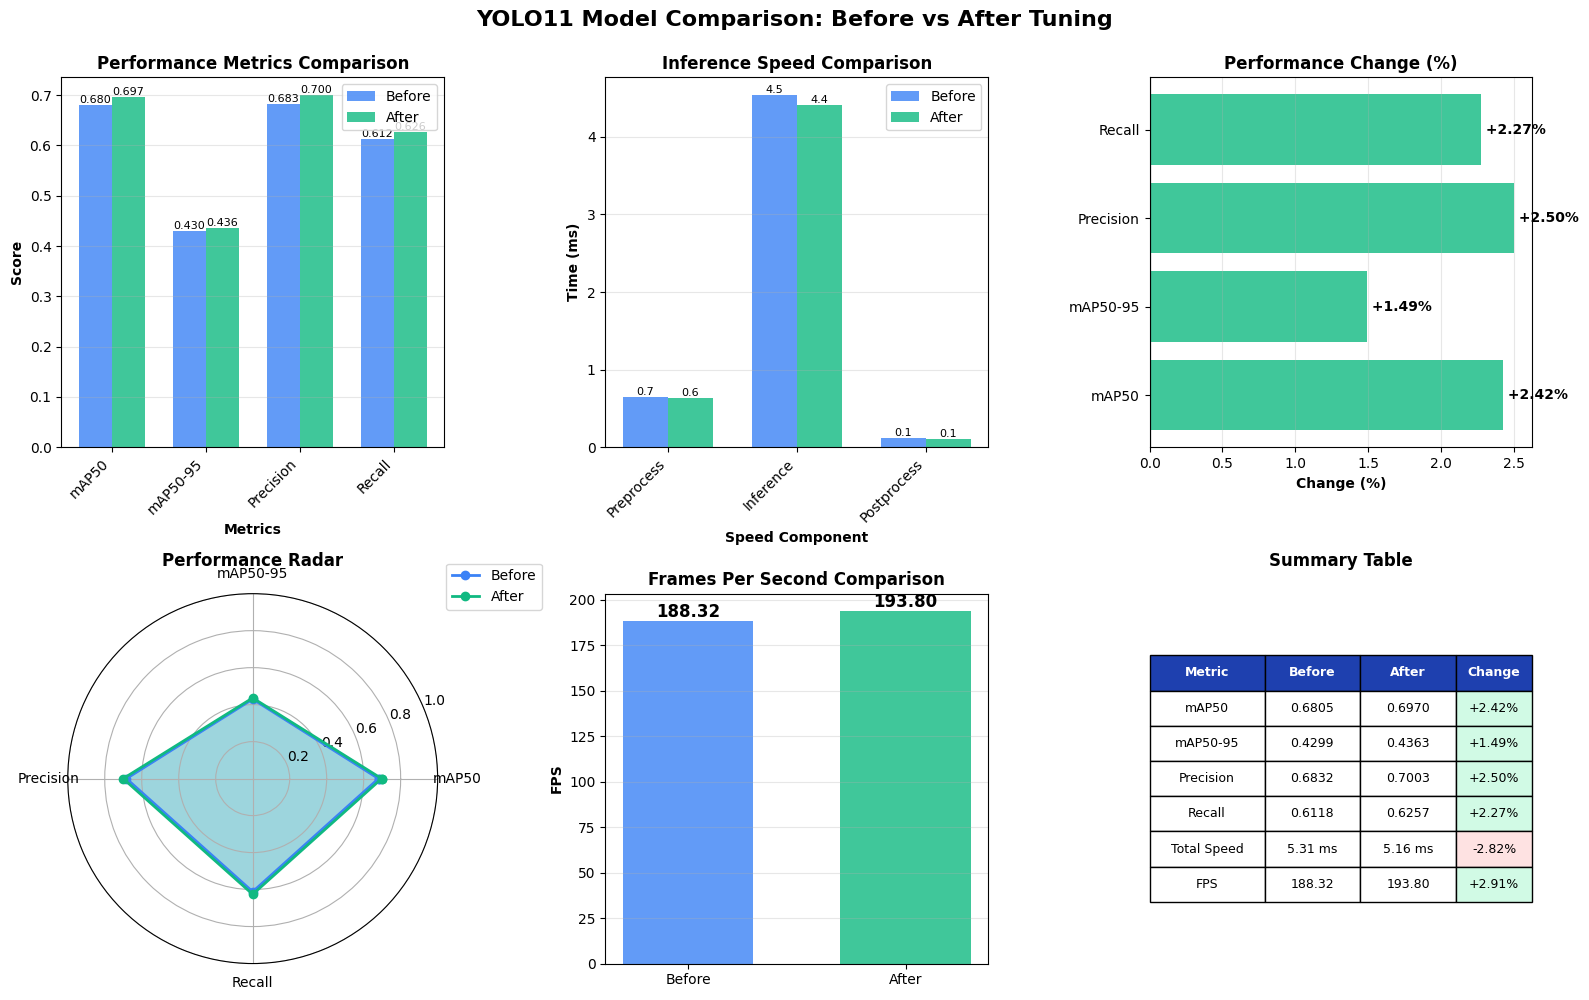

✓ Visualisasi selesai dibuat!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("="*70)
print("PERBANDINGAN YOLO11: BEFORE vs AFTER TUNING")
print("="*70)
print()

# ============================================================
# DATA HASIL EVALUASI (ISI DENGAN HASIL EVALUASI ANDA)
# ============================================================

# MODEL BEFORE TUNING (yolo11_model)
before_map50 = 0.6805        # mAP50 from test evaluation
before_map50_95 = 0.4299     # mAP50-95 from test evaluation
before_precision = 0.6832    # Precision from test evaluation
before_recall = 0.6118       # Recall from test evaluation
before_preprocess = 0.65     # Preprocess speed (ms)
before_inference = 4.54      # Inference speed (ms)
before_postprocess = 0.12    # Postprocess speed (ms)

# MODEL AFTER TUNING (yolo11_tuned)
after_map50 = 0.6970         # mAP50 from test evaluation
after_map50_95 = 0.4363      # mAP50-95 from test evaluation
after_precision = 0.7003     # Precision from test evaluation
after_recall = 0.6257        # Recall from test evaluation
after_preprocess = 0.64      # Preprocess speed (ms)
after_inference = 4.41       # Inference speed (ms)
after_postprocess = 0.11     # Postprocess speed (ms)

# ============================================================
# KALKULASI PERUBAHAN
# ============================================================
def calculate_change(before, after):
    """Hitung persentase perubahan"""
    if before == 0:
        return 0
    return ((after - before) / before) * 100

def get_status(change):
    """Dapatkan status perubahan"""
    if change > 0:
        return "✓ MENINGKAT", "🟢"
    elif change < 0:
        return "✗ MENURUN", "🔴"
    else:
        return "= SAMA", "🟡"

# Hitung perubahan untuk setiap metrik
changes = {
    'mAP50': calculate_change(before_map50, after_map50),
    'mAP50-95': calculate_change(before_map50_95, after_map50_95),
    'Precision': calculate_change(before_precision, after_precision),
    'Recall': calculate_change(before_recall, after_recall),
    'Preprocess': calculate_change(before_preprocess, after_preprocess),
    'Inference': calculate_change(before_inference, after_inference),
    'Postprocess': calculate_change(before_postprocess, after_postprocess)
}

# Hitung total speed dan FPS
before_total_speed = before_preprocess + before_inference + before_postprocess
after_total_speed = after_preprocess + after_inference + after_postprocess
before_fps = 1000 / before_total_speed if before_total_speed > 0 else 0
after_fps = 1000 / after_total_speed if after_total_speed > 0 else 0

# ============================================================
# TABEL PERBANDINGAN
# ============================================================
print("\n" + "="*70)
print("📊 HASIL PERBANDINGAN")
print("="*70)

print("\n1️⃣  METRICS PERFORMA:")
print("-"*70)
print(f"{'Metric':<15} {'Before':<12} {'After':<12} {'Change':<15} {'Status':<20}")
print("-"*70)

metrics_data = [
    ('mAP50', before_map50, after_map50, changes['mAP50']),
    ('mAP50-95', before_map50_95, after_map50_95, changes['mAP50-95']),
    ('Precision', before_precision, after_precision, changes['Precision']),
    ('Recall', before_recall, after_recall, changes['Recall'])
]

for metric, before, after, change in metrics_data:
    status, icon = get_status(change)
    print(f"{metric:<15} {before:<12.4f} {after:<12.4f} {change:>+7.2f}%     {icon} {status}")

print("\n2️⃣  INFERENCE SPEED:")
print("-"*70)
print(f"{'Metric':<15} {'Before':<12} {'After':<12} {'Change':<15} {'Status':<20}")
print("-"*70)

speed_data = [
    ('Preprocess', before_preprocess, after_preprocess, changes['Preprocess']),
    ('Inference', before_inference, after_inference, changes['Inference']),
    ('Postprocess', before_postprocess, after_postprocess, changes['Postprocess']),
    ('Total Speed', before_total_speed, after_total_speed, calculate_change(before_total_speed, after_total_speed)),
    ('FPS', before_fps, after_fps, calculate_change(before_fps, after_fps))
]

for metric, before, after, change in speed_data:
    status, icon = get_status(change)
    unit = " ms" if metric != 'FPS' else " fps"
    print(f"{metric:<15} {before:<12.2f} {after:<12.2f} {change:>+7.2f}%     {icon} {status}")

print("="*70)

# ============================================================
# KESIMPULAN
# ============================================================
print("\n3️⃣  KESIMPULAN:")
print("-"*70)

# Hitung rata-rata improvement
avg_performance_improvement = np.mean([
    changes['mAP50'],
    changes['mAP50-95'],
    changes['Precision'],
    changes['Recall']
])

speed_improvement = calculate_change(before_total_speed, after_total_speed)

print(f"\n📈 Performa Model:")
if avg_performance_improvement > 5:
    print(f"   ✓ Terjadi PENINGKATAN SIGNIFIKAN sebesar {avg_performance_improvement:.2f}%")
elif avg_performance_improvement > 0:
    print(f"   ✓ Terjadi peningkatan moderat sebesar {avg_performance_improvement:.2f}%")
elif avg_performance_improvement > -5:
    print(f"   ≈ Performa relatif STABIL (perubahan {avg_performance_improvement:.2f}%)")
else:
    print(f"   ✗ Terjadi penurunan performa sebesar {avg_performance_improvement:.2f}%")

print(f"\n⚡ Kecepatan Inferensi:")
if speed_improvement < -5:
    print(f"   ✓ Model LEBIH CEPAT {abs(speed_improvement):.2f}%")
    print(f"   ✓ FPS meningkat dari {before_fps:.2f} ke {after_fps:.2f}")
elif speed_improvement < 0:
    print(f"   ✓ Model sedikit lebih cepat ({abs(speed_improvement):.2f}%)")
elif speed_improvement < 5:
    print(f"   ≈ Kecepatan relatif SAMA (perubahan {speed_improvement:.2f}%)")
else:
    print(f"   ✗ Model lebih lambat {speed_improvement:.2f}%")

# Rekomendasi
print(f"\n💡 Rekomendasi:")
if avg_performance_improvement > 0 and speed_improvement <= 5:
    print("   ✓ GUNAKAN MODEL AFTER TUNING!")
    print("   ✓ Model menunjukkan improvement yang baik.")
elif avg_performance_improvement > 0 and speed_improvement > 10:
    print("   ⚠ Pertimbangkan trade-off performa vs kecepatan")
    print("   • Performa meningkat tapi kecepatan menurun")
elif avg_performance_improvement < 0:
    print("   ⚠ PERTAHANKAN MODEL BEFORE TUNING")
    print("   • Tuning tidak memberikan improvement")
else:
    print("   ≈ Kedua model memiliki performa serupa")

print("-"*70)

# ============================================================
# VISUALISASI
# ============================================================
print("\n📊 Membuat visualisasi...")

# Setup figure
fig = plt.figure(figsize=(16, 10))
fig.suptitle('YOLO11 Model Comparison: Before vs After Tuning',
             fontsize=16, fontweight='bold', y=0.995)

# 1. Bar Chart - Performance Metrics
ax1 = plt.subplot(2, 3, 1)
metrics_names = ['mAP50', 'mAP50-95', 'Precision', 'Recall']
before_values = [before_map50, before_map50_95, before_precision, before_recall]
after_values = [after_map50, after_map50_95, after_precision, after_recall]

x = np.arange(len(metrics_names))
width = 0.35

bars1 = ax1.bar(x - width/2, before_values, width, label='Before', color='#3b82f6', alpha=0.8)
bars2 = ax1.bar(x + width/2, after_values, width, label='After', color='#10b981', alpha=0.8)

ax1.set_xlabel('Metrics', fontweight='bold')
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_title('Performance Metrics Comparison', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics_names, rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Tambahkan nilai di atas bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# 2. Bar Chart - Speed Comparison
ax2 = plt.subplot(2, 3, 2)
speed_names = ['Preprocess', 'Inference', 'Postprocess']
before_speed_values = [before_preprocess, before_inference, before_postprocess]
after_speed_values = [after_preprocess, after_inference, after_postprocess]

x2 = np.arange(len(speed_names))
bars3 = ax2.bar(x2 - width/2, before_speed_values, width, label='Before', color='#3b82f6', alpha=0.8)
bars4 = ax2.bar(x2 + width/2, after_speed_values, width, label='After', color='#10b981', alpha=0.8)

ax2.set_xlabel('Speed Component', fontweight='bold')
ax2.set_ylabel('Time (ms)', fontweight='bold')
ax2.set_title('Inference Speed Comparison', fontweight='bold')
ax2.set_xticks(x2)
ax2.set_xticklabels(speed_names, rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=8)

# 3. Percentage Change Chart
ax3 = plt.subplot(2, 3, 3)
change_names = ['mAP50', 'mAP50-95', 'Precision', 'Recall']
change_values = [changes['mAP50'], changes['mAP50-95'], changes['Precision'], changes['Recall']]
colors = ['#10b981' if v >= 0 else '#ef4444' for v in change_values]

bars5 = ax3.barh(change_names, change_values, color=colors, alpha=0.8)
ax3.set_xlabel('Change (%)', fontweight='bold')
ax3.set_title('Performance Change (%)', fontweight='bold')
ax3.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax3.grid(axis='x', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars5, change_values)):
    ax3.text(val, i, f' {val:+.2f}%', va='center', fontweight='bold')

# 4. Radar Chart
ax4 = plt.subplot(2, 3, 4, projection='polar')
categories = ['mAP50', 'mAP50-95', 'Precision', 'Recall']
before_radar = [before_map50, before_map50_95, before_precision, before_recall]
after_radar = [after_map50, after_map50_95, after_precision, after_recall]

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
before_radar += before_radar[:1]
after_radar += after_radar[:1]
angles += angles[:1]

ax4.plot(angles, before_radar, 'o-', linewidth=2, label='Before', color='#3b82f6')
ax4.fill(angles, before_radar, alpha=0.25, color='#3b82f6')
ax4.plot(angles, after_radar, 'o-', linewidth=2, label='After', color='#10b981')
ax4.fill(angles, after_radar, alpha=0.25, color='#10b981')

ax4.set_xticks(angles[:-1])
ax4.set_xticklabels(categories)
ax4.set_ylim(0, 1)
ax4.set_title('Performance Radar', fontweight='bold', pad=20)
ax4.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax4.grid(True)

# 5. FPS Comparison
ax5 = plt.subplot(2, 3, 5)
fps_data = ['Before', 'After']
fps_values = [before_fps, after_fps]
colors_fps = ['#3b82f6', '#10b981']

bars6 = ax5.bar(fps_data, fps_values, color=colors_fps, alpha=0.8, width=0.6)
ax5.set_ylabel('FPS', fontweight='bold')
ax5.set_title('Frames Per Second Comparison', fontweight='bold')
ax5.grid(axis='y', alpha=0.3)

for bar in bars6:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

# 6. Summary Table
ax6 = plt.subplot(2, 3, 6)
ax6.axis('tight')
ax6.axis('off')

summary_data = [
    ['Metric', 'Before', 'After', 'Change'],
    ['mAP50', f'{before_map50:.4f}', f'{after_map50:.4f}', f'{changes["mAP50"]:+.2f}%'],
    ['mAP50-95', f'{before_map50_95:.4f}', f'{after_map50_95:.4f}', f'{changes["mAP50-95"]:+.2f}%'],
    ['Precision', f'{before_precision:.4f}', f'{after_precision:.4f}', f'{changes["Precision"]:+.2f}%'],
    ['Recall', f'{before_recall:.4f}', f'{after_recall:.4f}', f'{changes["Recall"]:+.2f}%'],
    ['Total Speed', f'{before_total_speed:.2f} ms', f'{after_total_speed:.2f} ms', f'{calculate_change(before_total_speed, after_total_speed):+.2f}%'],
    ['FPS', f'{before_fps:.2f}', f'{after_fps:.2f}', f'{calculate_change(before_fps, after_fps):+.2f}%']
]

table = ax6.table(cellText=summary_data, cellLoc='center', loc='center',
                 colWidths=[0.3, 0.25, 0.25, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Style header
for i in range(4):
    table[(0, i)].set_facecolor('#1e40af')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Style cells based on change
for i in range(1, 7):
    change_text = summary_data[i][3]
    if '+' in change_text:
        table[(i, 3)].set_facecolor('#d1fae5')
    elif change_text.startswith('-'):
        table[(i, 3)].set_facecolor('#fee2e2')

ax6.set_title('Summary Table', fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("✓ Visualisasi selesai dibuat!")
print("="*70)